In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import multivariate_normal
from scipy import io

In [2]:
data = io.loadmat("data/data.mat")
print("\nloaded %s data!")


loaded_data = io.loadmat("data/data.mat")
data, labels = loaded_data['X'], loaded_data['y']
test_data = loaded_data['X_test']
val_data = data[:1000]
val_labels = labels[:1000]
data = data[1000:]
labels = labels[1000:]


loaded %s data!


In [3]:
def norm_and_add_fiction(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    normalized_test = np.zeros_like(data)

    for i in range(data.shape[1]):
        normalized_test[:,i] = data[:,i] - mean[i]
        normalized_test[:,i] = normalized_test[:,i] / std[i]

    norm_b = np.array(np.hstack((normalized_test, np.ones((normalized_test.shape[0],1)))))
    return norm_b


normalized_data = norm_and_add_fiction(data)
fictional_val = norm_and_add_fiction(val_data)
m,n = np.asmatrix(normalized_data).shape

In [4]:
def batch_gradient_update(w, learning_rate, labels, data,i):
    return w + learning_rate * (labels[i] - scipy.special.expit(data[i].dot(w))) * data[i]

In [5]:
def batch_gradient_descent(i, labels, data):
    w = np.zeros(n)
    learning_rate = 1e-4

    for _ in range(0,i):
        np.random.shuffle(data)

        for i in range(m):
            w = batch_gradient_update(w, learning_rate, labels, data,i)

    return w

In [6]:
def train(w, labels, data):
    norm_w = np.linalg.norm(w[:len(w)-1])
    data = np.array(data)
    labels = np.array(labels)
    s = scipy.special.expit(data.dot(w))
    reg = 1e-3

    J1 = (reg * norm_w ** 2) / 2
    J2 = labels.T.dot(np.log(s))
    J3 = (1 - labels).T.dot(np.log(1 - s))

    J = J1 - J2 - J3

    return J

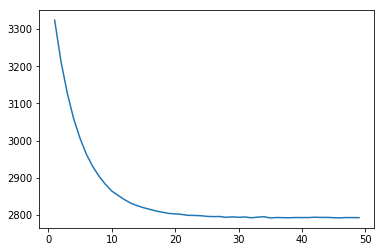

In [7]:
J, r = [], range(0,50)
for i in r:
    J += [train(batch_gradient_descent(i, labels, normalized_data), labels, normalized_data)]
plt.plot(r[1:], J[1:])

In [8]:
def stochastic_gradient_update(w, learning_rate, labels, data,i):
    return w + learning_rate * (labels[i] - scipy.special.expit(data[i].dot(w))) * data[i]

In [9]:
def stochastic_gradient_descent(i, labels, data):
    w = np.zeros(n)
    learning_rate = 1e-4

    for i in range(0,i):
        np.random.shuffle(data)

        w = batch_gradient_update(w, learning_rate, labels, data,i)

    return w

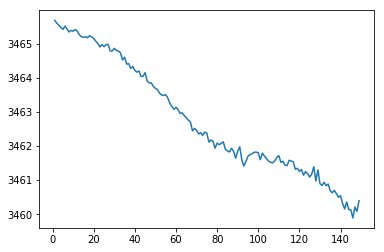

In [10]:
J, r = [], range(0,150)
for i in r:
    J += [train(stochastic_gradient_descent(i, labels, normalized_data), labels, normalized_data)]
plt.plot(r[1:], J[1:])

The stochastic gradient descent converged slower but it took far shorter time to run through it's iterations. In the end it was faster to run stochastic gradient descent for more iterations than to run batch gradient descent.

In [11]:
def step_gradient_descent(i, labels, data):
    w = np.zeros(n)
    delta = .1

    for i in range(0,i):
        np.random.shuffle(data)
        learning_rate = delta/(i+1)
        w = batch_gradient_update(w, learning_rate, labels, data,i)

    return w

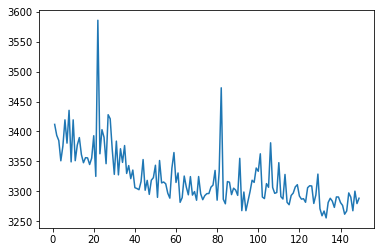

In [12]:
J, r = [], range(0,150)
for i in r:
    J += [train(step_gradient_descent(i, labels, normalized_data), labels, normalized_data)]
plt.plot(r[1:], J[1:])

The best value of delta I used was .1 and step gradient descent converged faster than both batch and stochastic gradient descent, but the variation in loss is far more sporadic

In [13]:
def predictions(X, w):
    p = scipy.special.expit(X.dot(w))
    p[p >= 0.5] = 1
    p[p < 0.5] = 0
    
    return p

In [14]:
def step_kaggle(i,data, delta, j):
    w = np.zeros(n)
    
    for _ in range(0, j):
        np.random.shuffle(data)
        for q in range(0,i):
            
            learning_rate = delta / (q + 1)

            w = batch_gradient_update(w, learning_rate, labels, data,q)

    return w

In [15]:
data, labels = loaded_data['X'], loaded_data['y']
all_data = norm_and_add_fiction(data)

In [16]:
test_norm = norm_and_add_fiction(test_data)

In [17]:
w = step_kaggle(250,all_data,.1,5)
pred = predictions(test_norm,w)

In [18]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
import numpy as np

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [19]:
results_to_csv(pred)